In [1]:
import numpy as np
import sys
import pandas as pd
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from joblib import Parallel, delayed
import time
start_time = time.time()  # Start time

## Global Variables

In [2]:
CLASSIFIER = ''

## Notebook Start Time

In [3]:
start_time = time.time()

## Data

In [4]:
my_frac=0.001

# Load dataset as pandas DataFrame
df_train = pd.read_parquet('./data/cic_iomt_2024_wifi_mqtt_train.parquet')
df_test = pd.read_parquet('./data/cic_iomt_2024_wifi_mqtt_test.parquet')  

# Create sample DataFrame for feature selection
df_train_sample = df_train.sample(frac=my_frac, random_state=1984)      
df_test_sample = df_test.sample(frac=my_frac, random_state=1984)   

# Create sample X and y from train and test, convert to numpy arrays
X_train_sample = df_train_sample.drop(columns=['label', 'class_label', 'category_label', 'attack_label']).to_numpy()
y_train_sample_2 = df_train_sample['class_label'].to_numpy()
y_train_sample_6 = df_train_sample['category_label'].to_numpy()
y_train_sample_19 = df_train_sample['attack_label'].to_numpy()


X_test_sample = df_test_sample.drop(columns=['label', 'class_label', 'category_label', 'attack_label']).to_numpy()
y_test_sample_2 = df_test_sample['class_label'].to_numpy()
y_test_sample_6 = df_test_sample['category_label'].to_numpy()
y_test_sample_19 = df_test_sample['attack_label'].to_numpy()


# Create full data X and y from train and test, convert to numpy arrays
X_train_full = df_train_sample.drop(columns=['label', 'class_label', 'category_label', 'attack_label']).to_numpy()
y_train_full_2 = df_train_sample['class_label'].to_numpy()
y_train_full_6 = df_train_sample['category_label'].to_numpy()
y_train_full_19 = df_train_sample['attack_label'].to_numpy()


X_test_full = df_test_sample.drop(columns=['label', 'class_label', 'category_label', 'attack_label']).to_numpy()
y_test_full_2 = df_test_sample['class_label'].to_numpy()
y_test_full_6 = df_test_sample['category_label'].to_numpy()
y_test_full_19 = df_test_sample['attack_label'].to_numpy()

## Benchmarks

We use hyperparameters from the CICIoMT2024 to establish benchmarks for classification on the dataset. We will then use pso to select the best features and compare results.

### Logistic Regression

In [5]:
lr_benchmark = LogisticRegression(
    penalty='l2', 
    dual=False, 
    tol=0.0001, 
    C=1.0, 
    fit_intercept=True, 
    intercept_scaling=1, 
    solver='lbfgs', 
    max_iter=100,
    warm_start=False, 
    n_jobs=-1
    )

#### Binary Classification

In [6]:
lr_benchmark.fit(X_train_sample, y_train_sample_2)
y_pred_lr_benchmark_2 = lr_benchmark.predict(X_test_sample)

In [7]:
# print the classification report
report_lr_benchmark_2 = classification_report(y_test_sample_2, y_pred_lr_benchmark_2, output_dict=True)
print(classification_report(y_test_sample_2, y_pred_lr_benchmark_2))

# calculate metrics
accuracy_lr_benchmark_2 = accuracy_score(y_test_sample_2, y_pred_lr_benchmark_2)
recall_lr_benchmark_2 = recall_score(y_test_sample_2, y_pred_lr_benchmark_2, average="weighted")
precision_lr_benchmark_2 = precision_score(y_test_sample_2, y_pred_lr_benchmark_2, average="weighted")
f1_lr_benchmark_2 = f1_score(y_test_sample_2, y_pred_lr_benchmark_2, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_lr_benchmark_2:.5f}")

              precision    recall  f1-score   support

      Attack       0.99      0.99      0.99      1579
      Benign       0.61      0.63      0.62        35

    accuracy                           0.98      1614
   macro avg       0.80      0.81      0.81      1614
weighted avg       0.98      0.98      0.98      1614

Accuracy: 0.98327


#### 6 Class Classification

In [8]:
lr_benchmark.fit(X_train_sample, y_train_sample_6)
y_pred_lr_benchmark_6 = lr_benchmark.predict(X_test_sample)

In [9]:
# print the classification report
report_lr_benchmark_6 = classification_report(y_test_sample_6, y_pred_lr_benchmark_6, output_dict=True)
print(classification_report(y_test_sample_6, y_pred_lr_benchmark_6))

# calculate accuracy
accuracy_lr_benchmark_6 = accuracy_score(y_test_sample_6, y_pred_lr_benchmark_6)
recall_lr_benchmark_6 = recall_score(y_test_sample_6, y_pred_lr_benchmark_6, average="weighted")
precision_lr_benchmark_6 = precision_score(y_test_sample_6, y_pred_lr_benchmark_6, average="weighted")
f1_lr_benchmark_6 = f1_score(y_test_sample_6, y_pred_lr_benchmark_6, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_lr_benchmark_6:.5f}")

              precision    recall  f1-score   support

      Benign       0.64      0.60      0.62        35
        DDos       0.67      1.00      0.81      1053
         Dos       0.00      0.00      0.00       438
        MQTT       0.20      0.02      0.03        62
       Recon       1.00      0.16      0.28        25
    Spoofing       0.00      0.00      0.00         1

    accuracy                           0.67      1614
   macro avg       0.42      0.30      0.29      1614
weighted avg       0.48      0.67      0.54      1614

Accuracy: 0.66729


#### 19 Class Classification

In [10]:
lr_benchmark.fit(X_train_sample, y_train_sample_19)
y_pred_lr_benchmark_19 = lr_benchmark.predict(X_test_sample)

In [11]:
# print the classification report
report_lr_benchmark_19 = classification_report(y_test_sample_19, y_pred_lr_benchmark_19, output_dict=True)
print(classification_report(y_test_sample_19, y_pred_lr_benchmark_19))

# calculate accuracy
accuracy_lr_benchmark_19 = accuracy_score(y_test_sample_19, y_pred_lr_benchmark_19)
recall_lr_benchmark_19 = recall_score(y_test_sample_19, y_pred_lr_benchmark_19, average="weighted")
precision_lr_benchmark_19 = precision_score(y_test_sample_19, y_pred_lr_benchmark_19, average="weighted")
f1_lr_benchmark_19 = f1_score(y_test_sample_19, y_pred_lr_benchmark_19, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_lr_benchmark_19:.5f}")

                    precision    recall  f1-score   support

      ARP_spoofing       0.00      0.00      0.00         1
            Benign       0.56      0.63      0.59        35
         DDoS_ICMP       0.30      0.74      0.43       352
          DDoS_SYN       0.00      0.00      0.00       177
          DDoS_TCP       0.00      0.00      0.00       157
          DDoS_UDP       0.52      1.00      0.69       367
DDoS_connect_flood       0.00      0.00      0.00        41
DDoS_publish_flood       0.00      0.00      0.00         9
          DoS_ICMP       0.00      0.00      0.00       120
           DoS_SYN       0.00      0.00      0.00        97
           DoS_TCP       0.00      0.00      0.00        78
           DoS_UDP       0.00      0.00      0.00       143
 DoS_connect_flood       0.00      0.00      0.00         1
 DoS_publish_flood       0.00      0.00      0.00        11
           OS_scan       0.00      0.00      0.00         3
         Port_scan       0.00      0.00

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

### AdaBoost

In [12]:
ada_benchmark = AdaBoostClassifier(
    DecisionTreeClassifier(), 
    n_estimators=50,
    learning_rate=1.0, 
    algorithm='SAMME.R', 
    random_state=1984
    )

#### Binary Classification

In [13]:
ada_benchmark.fit(X_train_sample, y_train_sample_2)
y_pred_ada_benchmark_2 = ada_benchmark.predict(X_test_sample)

In [66]:
# print the classification report
report_ada_benchmark_2 = classification_report(y_test_sample_2, y_pred_ada_benchmark_2, output_dict=True)
print(classification_report(y_test_sample_2, y_pred_ada_benchmark_2))

# calculate accuracy
accuracy_ada_benchmark_2 = accuracy_score(y_test_sample_2, y_pred_ada_benchmark_2)
recall_ada_benchmark_2 = recall_score(y_test_sample_2, y_pred_ada_benchmark_2, average="weighted")
precision_ada_benchmark_2 = precision_score(y_test_sample_2, y_pred_ada_benchmark_2, average="weighted")
f1_ada_benchmark_2 = f1_score(y_test_sample_2, y_pred_ada_benchmark_2, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_ada_benchmark_2:.5f}")

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      1579
      Benign       0.91      0.86      0.88        35

    accuracy                           1.00      1614
   macro avg       0.95      0.93      0.94      1614
weighted avg       0.99      1.00      0.99      1614

Accuracy: 0.99504


#### 6 Class Classification

In [15]:
ada_benchmark.fit(X_train_sample, y_train_sample_6)
y_pred_ada_benchmark_6 = ada_benchmark.predict(X_test_sample)

In [16]:
# print the classification report
report_ada_benchmark_6 = classification_report(y_test_sample_6, y_pred_ada_benchmark_6, output_dict=True)
print(classification_report(y_test_sample_6, y_pred_ada_benchmark_6))

# calculate accuracy
accuracy_ada_benchmark_6 = accuracy_score(y_test_sample_6, y_pred_ada_benchmark_6)
recall_ada_benchmark_6 = recall_score(y_test_sample_6, y_pred_ada_benchmark_6, average="weighted")
precision_ada_benchmark_6 = precision_score(y_test_sample_6, y_pred_ada_benchmark_6, average="weighted")
f1_ada_benchmark_6 = f1_score(y_test_sample_6, y_pred_ada_benchmark_6, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_ada_benchmark_6:.5f}")

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Benign       0.97      0.89      0.93        35
        DDos       1.00      1.00      1.00      1053
         Dos       1.00      1.00      1.00       438
        MQTT       1.00      0.98      0.99        62
       Recon       0.81      1.00      0.89        25
    Spoofing       0.00      0.00      0.00         1

    accuracy                           1.00      1614
   macro avg       0.80      0.81      0.80      1614
weighted avg       1.00      1.00      0.99      1614

Accuracy: 0.99504


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

#### 19 Class Classification

In [17]:
ada_benchmark.fit(X_train_sample, y_train_sample_19)
y_pred_ada_benchmark_19 = ada_benchmark.predict(X_test_sample)

In [18]:
report_ada_benchmark_19 = classification_report(y_test_sample_19, y_pred_ada_benchmark_19, output_dict=True)
print(classification_report(y_test_sample_19, y_pred_ada_benchmark_19))

# calculate accuracy
accuracy_ada_benchmark_19 = accuracy_score(y_test_sample_19, y_pred_ada_benchmark_19)
recall_ada_benchmark_19 = recall_score(y_test_sample_19, y_pred_ada_benchmark_19, average="weighted")
precision_ada_benchmark_19 = precision_score(y_test_sample_19, y_pred_ada_benchmark_19, average="weighted")
f1_ada_benchmark_19 = f1_score(y_test_sample_19, y_pred_ada_benchmark_19, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_ada_benchmark_19:.5f}")

                    precision    recall  f1-score   support

      ARP_spoofing       0.00      0.00      0.00         1
            Benign       1.00      0.91      0.96        35
         DDoS_ICMP       0.72      1.00      0.84       352
          DDoS_SYN       1.00      1.00      1.00       177
          DDoS_TCP       0.99      1.00      1.00       157
          DDoS_UDP       0.98      0.63      0.77       367
DDoS_connect_flood       1.00      1.00      1.00        41
DDoS_publish_flood       1.00      0.11      0.20         9
          DoS_ICMP       1.00      1.00      1.00       120
           DoS_SYN       1.00      0.99      0.99        97
           DoS_TCP       1.00      1.00      1.00        78
           DoS_UDP       1.00      1.00      1.00       143
 DoS_connect_flood       1.00      1.00      1.00         1
 DoS_publish_flood       0.58      1.00      0.73        11
           OS_scan       1.00      0.67      0.80         3
         Port_scan       0.91      0.95

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

#### Random Forest

In [19]:
rf_benchmark = RandomForestClassifier(
    n_estimators=100, 
    criterion='gini', 
    min_samples_split=2, 
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0, 
    max_features='sqrt', 
    min_impurity_decrease=0.0,
    bootstrap=True, 
    oob_score=False, 
    warm_start=False, 
    ccp_alpha=0.0, 
    n_jobs=-1, 
    random_state=1984
    )

#### Binary Classification

In [20]:
rf_benchmark.fit(X_train_sample, y_train_sample_2) 
y_pred_rf_benchmark_2 = rf_benchmark.predict(X_test_sample)   

In [21]:
# print the classification report
report_rf_benchmark_2 = classification_report(y_test_sample_2, y_pred_rf_benchmark_2, output_dict=True)
print(classification_report(y_test_sample_2, y_pred_rf_benchmark_2))

# calculate accuracy
accuracy_rf_benchmark_2 = accuracy_score(y_test_sample_2, y_pred_rf_benchmark_2)
recall_rf_benchmark_2 = recall_score(y_test_sample_2, y_pred_rf_benchmark_2, average="weighted")
precision_rf_benchmark_2 = precision_score(y_test_sample_2, y_pred_rf_benchmark_2, average="weighted")
f1_rf_benchmark_2 = f1_score(y_test_sample_2, y_pred_rf_benchmark_2, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_rf_benchmark_2:.5f}")

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      1579
      Benign       0.97      0.89      0.93        35

    accuracy                           1.00      1614
   macro avg       0.98      0.94      0.96      1614
weighted avg       1.00      1.00      1.00      1614

Accuracy: 0.99690


#### 6 Class Classification

In [22]:
rf_benchmark.fit(X_train_sample, y_train_sample_6) 
y_pred_rf_benchmark_6 = rf_benchmark.predict(X_test_sample)   

In [23]:
# print the classification report
report_rf_benchmark_6 = classification_report(y_test_sample_6, y_pred_rf_benchmark_6, output_dict=True)
print(classification_report(y_test_sample_6, y_pred_rf_benchmark_6))

# calculate accuracy
accuracy_rf_benchmark_6 = accuracy_score(y_test_sample_6, y_pred_rf_benchmark_6)
recall_rf_benchmark_6 = recall_score(y_test_sample_6, y_pred_rf_benchmark_6, average="weighted")
precision_rf_benchmark_6 = precision_score(y_test_sample_6, y_pred_rf_benchmark_6, average="weighted")
f1_rf_benchmark_6 = f1_score(y_test_sample_6, y_pred_rf_benchmark_6, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_rf_benchmark_6:.5f}")

              precision    recall  f1-score   support

      Benign       0.91      0.91      0.91        35
        DDos       1.00      1.00      1.00      1053
         Dos       1.00      1.00      1.00       438
        MQTT       1.00      1.00      1.00        62
       Recon       0.86      0.96      0.91        25
    Spoofing       0.00      0.00      0.00         1

    accuracy                           1.00      1614
   macro avg       0.80      0.81      0.80      1614
weighted avg       0.99      1.00      0.99      1614

Accuracy: 0.99504


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

#### 19 Class Classification

In [24]:
rf_benchmark.fit(X_train_sample, y_train_sample_19) 
y_pred_rf_benchmark_19 = rf_benchmark.predict(X_test_sample)    

In [25]:
# print the classification report
report_rf_benchmark_19 = classification_report(y_test_sample_19, y_pred_rf_benchmark_19, output_dict=True)
print(classification_report(y_test_sample_19, y_pred_rf_benchmark_19))

# calculate accuracy
accuracy_rf_benchmark_19 = accuracy_score(y_test_sample_19, y_pred_rf_benchmark_19)
recall_rf_benchmark_19 = recall_score(y_test_sample_19, y_pred_rf_benchmark_19, average="weighted")
precision_rf_benchmark_19 = precision_score(y_test_sample_19, y_pred_rf_benchmark_19, average="weighted")
f1_rf_benchmark_19 = f1_score(y_test_sample_19, y_pred_rf_benchmark_19, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_rf_benchmark_19:.5f}")

                    precision    recall  f1-score   support

      ARP_spoofing       0.00      0.00      0.00         1
            Benign       0.91      0.91      0.91        35
         DDoS_ICMP       1.00      1.00      1.00       352
          DDoS_SYN       1.00      1.00      1.00       177
          DDoS_TCP       1.00      1.00      1.00       157
          DDoS_UDP       1.00      1.00      1.00       367
DDoS_connect_flood       1.00      1.00      1.00        41
DDoS_publish_flood       1.00      0.11      0.20         9
          DoS_ICMP       1.00      0.99      1.00       120
           DoS_SYN       1.00      1.00      1.00        97
           DoS_TCP       1.00      1.00      1.00        78
           DoS_UDP       1.00      1.00      1.00       143
 DoS_connect_flood       1.00      1.00      1.00         1
 DoS_publish_flood       0.58      1.00      0.73        11
           OS_scan       1.00      0.33      0.50         3
         Port_scan       0.78      1.00

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

## GA Code

## Feature Selection With GA 

### FUNCTION: Feature reduction with Genetics Algorithm

In [26]:
# define overall function (just combined 4 code chunks above into 1 easy to use function)
def ga_feature_reduction(X_train_sample, y_train_sample, X_test_sample, y_test_sample, 
                         population_size=20, n_generations=50, mutation_rate=0.1, 
                         num_elites=2, CLASSIFIER="rf", metric="accuracy"):
    # Validate inputs
    if population_size % 2 != 0:
        raise ValueError("Population size must be an even number.")
    
    # Get the number of features for individual length
    n_features = X_train_sample.shape[1]
    
    # Initialize population with random binary values (0 or 1)
    population = np.random.randint(2, size=(population_size, n_features))
    
    best_fitness_overall = 0
    best_individual_overall = None
    termination_reason = None

    # Main loop for the genetic algorithm
    for generation in range(n_generations):
        print(f"LOOP STEP: Generation {generation + 1}")

        # Calculate fitness scores for the current population
        fitness_scores = np.array([fitness_function(individual, y_train_sample, y_test_sample, CLASSIFIER, metric) 
                                    for individual in population])
        print(f"Fitness Scores: {fitness_scores}") 
        
        # Track the best individual in the current generation
        current_best_fitness = np.max(fitness_scores)
        current_best_individual = population[np.argmax(fitness_scores)]
        
        # Update overall best fitness and individual if necessary
        if current_best_fitness > best_fitness_overall:
            best_fitness_overall = current_best_fitness
            best_individual_overall = current_best_individual
        
        print(f"Overall best fitness: {best_fitness_overall:.7f}, Overall best individual: {best_individual_overall}")

        # Selection: roulette wheel selection based on fitness
        probabilities = fitness_scores / np.sum(fitness_scores)
        selected_indices = np.random.choice(np.arange(population_size), size=population_size, p=probabilities)
        selected_population = population[selected_indices]

        # Elitism: preserve the best individuals
        elite_indices = np.argsort(fitness_scores)[-num_elites:]
        elite_population = population[elite_indices]

        # Crossover: single-point crossover
        offspring = []
        for i in range(0, population_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i + 1]
            crossover_point = np.random.randint(1, n_features - 1)
            child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
            child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
            offspring.extend([child1, child2])

        offspring = np.array(offspring[:population_size - num_elites])  # Ensure correct size by trimming excess

        # Mutation: flip bits with a probability of mutation_rate
        for individual in offspring:
            mutation_mask = np.random.rand(n_features) < mutation_rate
            individual[mutation_mask] = 1 - individual[mutation_mask]

        # Replace the population with offspring plus elite individuals
        population = np.vstack((elite_population, offspring))
    
    # Function output
    print(f"Termination Reason: {termination_reason}")
    print(f"Best Fitness: {best_fitness_overall}")
    print(f"Best Individual: {best_individual_overall}")
    return best_fitness_overall, best_individual_overall

def fitness_function(individual, y_train_sample, y_test_sample, CLASSIFIER="rf", metric="accuracy"):
    selected_features = np.where(individual == 1)[0]  # Select features based on individual's genes
    
    if len(selected_features) == 0:  # Avoid empty feature set
        return 0
    
    X_train_selected = X_train_sample[:, selected_features]
    X_test_selected = X_test_sample[:, selected_features]

    if CLASSIFIER == 'lr':
        lr = LogisticRegression()
        lr.fit(X_train_selected, y_train_sample)
        y_pred = lr.predict(X_test_selected)

    elif CLASSIFIER == 'ada':
        ada = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=1984)
        ada.fit(X_train_selected, y_train_sample)
        y_pred = ada.predict(X_test_selected)

    elif CLASSIFIER == 'rf':
        rf = RandomForestClassifier()
        rf.fit(X_train_selected, y_train_sample)
        y_pred = rf.predict(X_test_selected)

    # Calculate the chosen metric
    if metric == 'accuracy':
        score = accuracy_score(y_test_sample, y_pred)
    elif metric == 'precision':
        score = precision_score(y_test_sample, y_pred, average='weighted')
    elif metric == 'recall':
        score = recall_score(y_test_sample, y_pred, average='weighted')
    elif metric == 'f1':
        score = f1_score(y_test_sample, y_pred, average='weighted')
    else:
        raise ValueError("Invalid metric. Choose from 'accuracy', 'precision', 'recall', or 'f1'.")

    return score


## Feature Selection With GA

In [27]:
# Hyperparameters
population_size = 4
n_generations = 3
mutation_rate = 0.1
num_elites = 2
metric = "accuracy"

### Logistic Regression

#### Binary Classification

In [28]:
# Call the GA function
global_best_fitness, global_best_position = ga_feature_reduction(
    X_train_sample = X_train_sample,
    y_train_sample = y_train_sample_2,
    X_test_sample = X_test_sample,
    y_test_sample = y_test_sample_2,
    population_size = population_size,
    n_generations = n_generations,
    mutation_rate = mutation_rate,
    num_elites = num_elites,
    CLASSIFIER = "lr",
    metric = metric
)

LOOP STEP: Generation 1


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Fitness Scores: [0.98203222 0.98141264 0.98513011 0.98203222]
Overall best fitness: 0.9851301, Overall best individual: [0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1
 1 1 0 1 0 1 0 0]
LOOP STEP: Generation 2


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Fitness Scores: [0.98203222 0.98513011 0.9826518  0.98327138]
Overall best fitness: 0.9851301, Overall best individual: [0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1
 1 1 0 1 0 1 0 0]
LOOP STEP: Generation 3


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Fitness Scores: [0.98327138 0.98513011 0.97769517 0.98079306]
Overall best fitness: 0.9851301, Overall best individual: [0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1
 1 1 0 1 0 1 0 0]
Termination Reason: None
Best Fitness: 0.9851301115241635
Best Individual: [0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1
 1 1 0 1 0 1 0 0]


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# use the best features identified by GA
selected_features = np.array(global_best_position, dtype=bool)
# Apply the selected features to your datasets
X_train_selected = X_train_sample[:, selected_features]
X_test_selected = X_test_sample[:, selected_features]

lr_benchmark.fit(X_train_selected, y_train_sample_2) 
y_pred_lr_ga_2 = lr_benchmark.predict(X_test_selected)  


In [30]:
# print the classification report
report_lr_ga_2 = classification_report(y_test_sample_2, y_pred_lr_ga_2, output_dict=True)
print(classification_report(y_test_sample_2, y_pred_lr_ga_2))

print(f"Number of selected features: {X_train_selected.shape[1]}")

# calculate accuracy
accuracy_lr_ga_2 = accuracy_score(y_test_sample_2, y_pred_lr_ga_2)
recall_lr_ga_2 = recall_score(y_test_sample_2, y_pred_lr_ga_2, average="weighted")
precision_lr_ga_2 = precision_score(y_test_sample_2, y_pred_lr_ga_2, average="weighted")
f1_lr_ga_2 = f1_score(y_test_sample_2, y_pred_lr_ga_2, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_lr_ga_2:.5f}")

              precision    recall  f1-score   support

      Attack       0.99      1.00      0.99      1579
      Benign       0.79      0.43      0.56        35

    accuracy                           0.99      1614
   macro avg       0.89      0.71      0.77      1614
weighted avg       0.98      0.99      0.98      1614

Number of selected features: 23
Accuracy: 0.98513


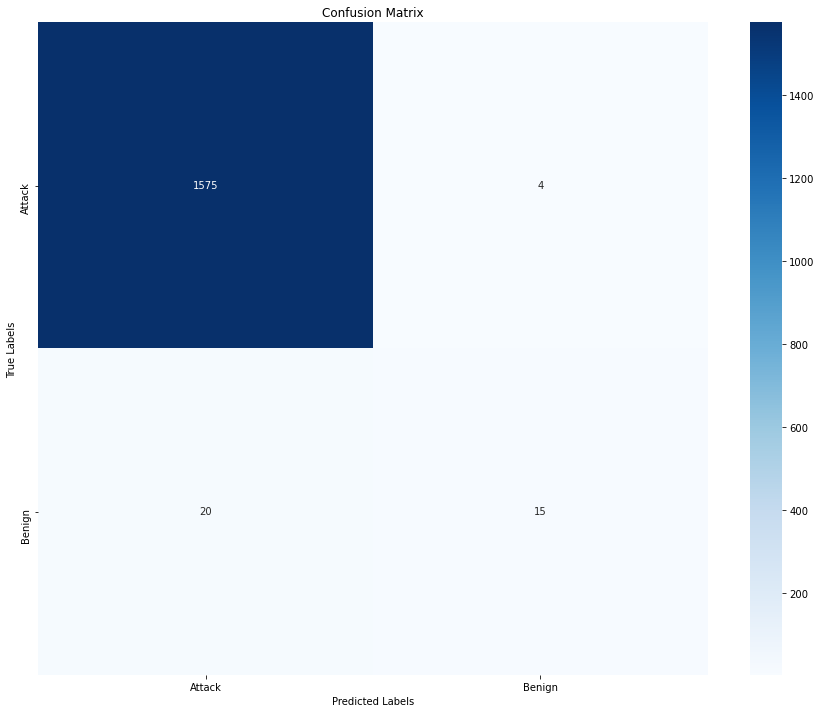

In [31]:
# generate the confusion matrix
cm_lr_ga_2 = confusion_matrix(y_test_sample_2, y_pred_lr_ga_2)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_lr_ga_2, annot=True, fmt='d', cmap='Blues', xticklabels=lr_benchmark.classes_, yticklabels=lr_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 6 Class Classification

In [32]:
# Call the GA function
global_best_fitness, global_best_position = ga_feature_reduction(
    X_train_sample = X_train_sample,
    y_train_sample = y_train_sample_6,
    X_test_sample = X_test_sample,
    y_test_sample = y_test_sample_6,
    population_size = population_size,
    n_generations = n_generations,
    mutation_rate = mutation_rate,
    num_elites = num_elites,
    CLASSIFIER = "lr",
    metric = metric
)

LOOP STEP: Generation 1


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Fitness Scores: [0.66480793 0.66542751 0.65303594 0.65675341]
Overall best fitness: 0.6654275, Overall best individual: [1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 0]
LOOP STEP: Generation 2


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Fitness Scores: [0.66480793 0.66542751 0.65241636 0.65303594]
Overall best fitness: 0.6654275, Overall best individual: [1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 0]
LOOP STEP: Generation 3


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Fitness Scores: [0.66480793 0.66542751 0.66790582 0.65861214]
Overall best fitness: 0.6679058, Overall best individual: [1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0]
Termination Reason: None
Best Fitness: 0.667905824039653
Best Individual: [1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0]


In [33]:
# use the best features identified by GA
selected_features = np.array(global_best_position, dtype=bool)
# Apply the selected features to your datasets
X_train_selected = X_train_sample[:, selected_features]
X_test_selected = X_test_sample[:, selected_features]

lr_benchmark.fit(X_train_selected, y_train_sample_6) 
y_pred_lr_ga_6 = lr_benchmark.predict(X_test_selected)  

In [34]:
# print the classification report
report_lr_ga_6 = classification_report(y_test_sample_6, y_pred_lr_ga_6, output_dict=True)
print(classification_report(y_test_sample_6, y_pred_lr_ga_6))

print(f"Number of selected features: {X_train_selected.shape[1]}")

# calculate accuracy
accuracy_lr_ga_6 = accuracy_score(y_test_sample_6, y_pred_lr_ga_6)
recall_lr_ga_6 = recall_score(y_test_sample_6, y_pred_lr_ga_6, average="weighted")
precision_lr_ga_6 = precision_score(y_test_sample_6, y_pred_lr_ga_6, average="weighted")
f1_lr_ga_6 = f1_score(y_test_sample_6, y_pred_lr_ga_6, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_lr_ga_6:.5f}")

              precision    recall  f1-score   support

      Benign       1.00      0.63      0.77        35
        DDos       0.67      1.00      0.80      1053
         Dos       0.00      0.00      0.00       438
        MQTT       0.00      0.00      0.00        62
       Recon       0.29      0.08      0.12        25
    Spoofing       0.00      0.00      0.00         1

    accuracy                           0.67      1614
   macro avg       0.33      0.28      0.28      1614
weighted avg       0.46      0.67      0.54      1614

Number of selected features: 20
Accuracy: 0.66667


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

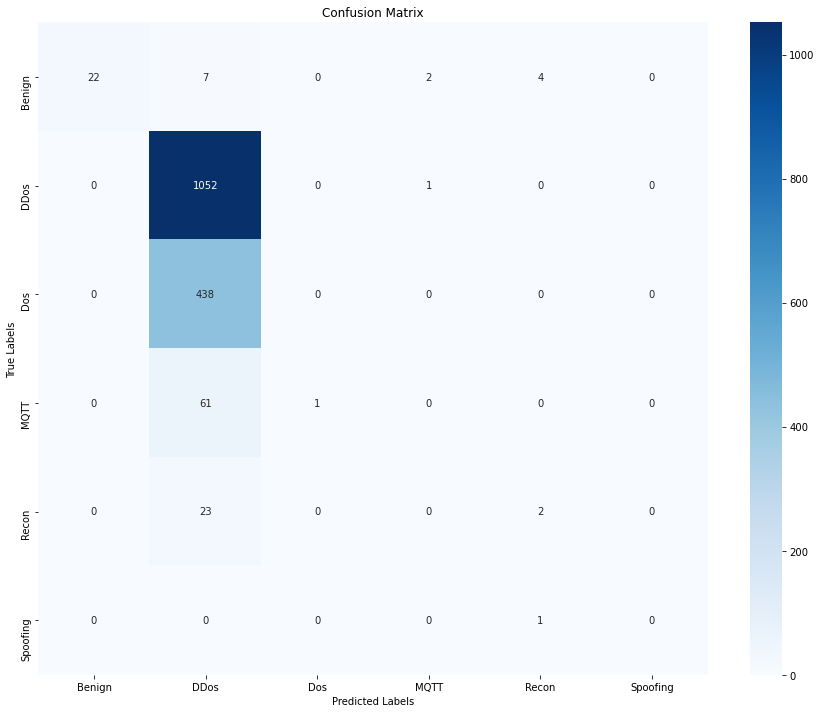

In [35]:
# generate the confusion matrix
cm_lr_ga_6 = confusion_matrix(y_test_sample_6, y_pred_lr_ga_6)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_lr_ga_6, annot=True, fmt='d', cmap='Blues', xticklabels=lr_benchmark.classes_, yticklabels=lr_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 19 Class Classification

In [36]:
# Call the GA function
global_best_fitness, global_best_position = ga_feature_reduction(
    X_train_sample = X_train_sample,
    y_train_sample = y_train_sample_19,
    X_test_sample = X_test_sample,
    y_test_sample = y_test_sample_19,
    population_size = population_size,
    n_generations = n_generations,
    mutation_rate = mutation_rate,
    num_elites = num_elites,
    CLASSIFIER = "lr",
    metric = metric
)

LOOP STEP: Generation 1


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Fitness Scores: [0.46034696 0.24039653 0.38289963 0.22986369]
Overall best fitness: 0.4603470, Overall best individual: [1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0]
LOOP STEP: Generation 2


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Fitness Scores: [0.38289963 0.46034696 0.22924411 0.38166047]
Overall best fitness: 0.4603470, Overall best individual: [1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0]
LOOP STEP: Generation 3


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Fitness Scores: [0.38289963 0.46034696 0.40334572 0.46034696]
Overall best fitness: 0.4603470, Overall best individual: [1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0]
Termination Reason: None
Best Fitness: 0.4603469640644362
Best Individual: [1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0]


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# use the best features identified by GA
selected_features = np.array(global_best_position, dtype=bool)
# Apply the selected features to your datasets
X_train_selected = X_train_sample[:, selected_features]
X_test_selected = X_test_sample[:, selected_features]

lr_benchmark.fit(X_train_selected, y_train_sample_19) 
y_pred_lr_ga_19 = lr_benchmark.predict(X_test_selected)  

In [38]:
# print the classification report
report_lr_ga_19 = classification_report(y_test_sample_19, y_pred_lr_ga_19, output_dict=True)
print(classification_report(y_test_sample_19, y_pred_lr_ga_19))

print(f"Number of selected features: {X_train_selected.shape[1]}")

# calculate accuracy
accuracy_lr_ga_19 = accuracy_score(y_test_sample_19, y_pred_lr_ga_19)
recall_lr_ga_19 = recall_score(y_test_sample_19, y_pred_lr_ga_19, average="weighted")
precision_lr_ga_19 = precision_score(y_test_sample_19, y_pred_lr_ga_19, average="weighted")
f1_lr_ga_19 = f1_score(y_test_sample_19, y_pred_lr_ga_19, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_lr_ga_19:.5f}")

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

                    precision    recall  f1-score   support

      ARP_spoofing       0.00      0.00      0.00         1
            Benign       0.58      1.00      0.74        35
         DDoS_ICMP       0.65      0.97      0.78       352
          DDoS_SYN       0.00      0.00      0.00       177
          DDoS_TCP       0.00      0.00      0.00       157
          DDoS_UDP       0.37      0.99      0.54       367
DDoS_connect_flood       0.00      0.00      0.00        41
DDoS_publish_flood       0.00      0.00      0.00         9
          DoS_ICMP       0.00      0.00      0.00       120
           DoS_SYN       0.03      0.01      0.02        97
           DoS_TCP       0.00      0.00      0.00        78
           DoS_UDP       0.00      0.00      0.00       143
 DoS_connect_flood       0.00      0.00      0.00         1
 DoS_publish_flood       0.00      0.00      0.00        11
           OS_scan       0.00      0.00      0.00         3
         Port_scan       0.00      0.00

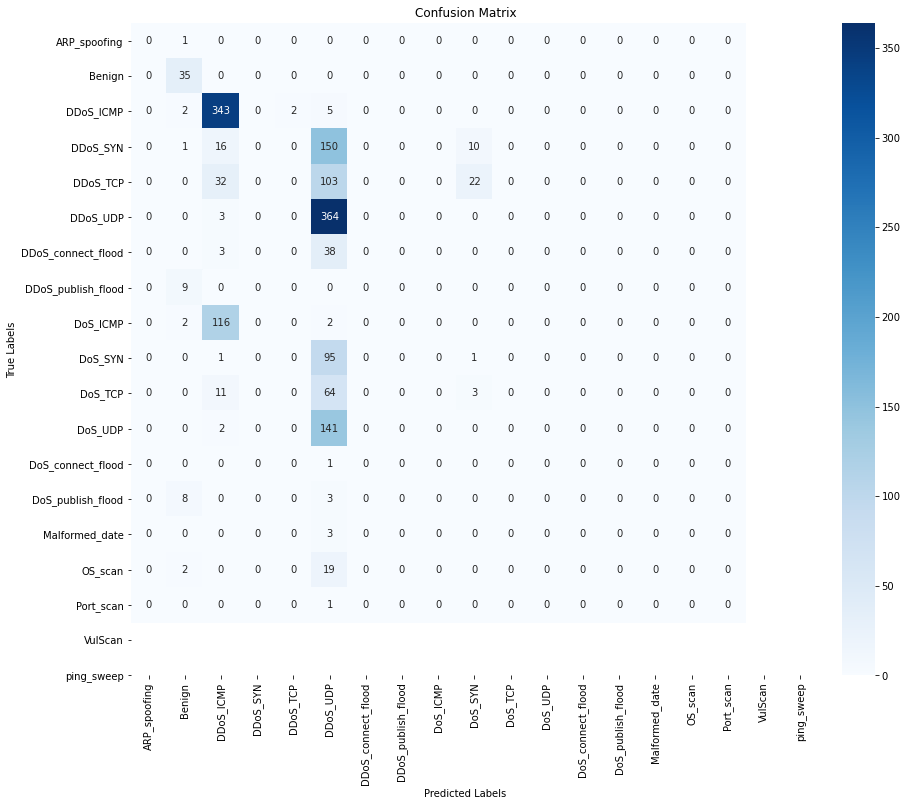

In [39]:
# generate the confusion matrix
cm_lr_ga_19 = confusion_matrix(y_test_sample_19, y_pred_lr_ga_19)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_lr_ga_19, annot=True, fmt='d', cmap='Blues', xticklabels=lr_benchmark.classes_, yticklabels=lr_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### AdaBoost

#### Binary Classification

In [40]:
# Call the GA function
global_best_fitness, global_best_position = ga_feature_reduction(
    X_train_sample = X_train_sample,
    y_train_sample = y_train_sample_2,
    X_test_sample = X_test_sample,
    y_test_sample = y_test_sample_2,
    population_size = population_size,
    n_generations = n_generations,
    mutation_rate = mutation_rate,
    num_elites = num_elites,
    CLASSIFIER = "ada",
    metric = metric
)

LOOP STEP: Generation 1
Fitness Scores: [0.99814126 0.99566295 0.99566295 0.99814126]
Overall best fitness: 0.9981413, Overall best individual: [0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1
 1 1 0 0 1 1 0 0]
LOOP STEP: Generation 2
Fitness Scores: [0.99814126 0.99814126 0.99380421 0.99690211]
Overall best fitness: 0.9981413, Overall best individual: [0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1
 1 1 0 0 1 1 0 0]
LOOP STEP: Generation 3
Fitness Scores: [0.99814126 0.99814126 0.99876084 0.99442379]
Overall best fitness: 0.9987608, Overall best individual: [0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1
 0 1 0 0 1 0 1 1]
Termination Reason: None
Best Fitness: 0.9987608426270136
Best Individual: [0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1
 0 1 0 0 1 0 1 1]


In [41]:
# use the best features identified by GA
selected_features = np.array(global_best_position, dtype=bool)
# Apply the selected features to your datasets
X_train_selected = X_train_sample[:, selected_features]
X_test_selected = X_test_sample[:, selected_features]

ada_benchmark.fit(X_train_selected, y_train_sample_2) 
y_pred_ada_ga_2 = ada_benchmark.predict(X_test_selected)  

In [42]:
# print the classification report
report_ada_ga_2 = classification_report(y_test_sample_2, y_pred_ada_ga_2, output_dict=True)
print(classification_report(y_test_sample_2, y_pred_ada_ga_2))

print(f"Number of selected features: {X_train_selected.shape[1]}")

# calculate accuracy
accuracy_ada_ga_2 = accuracy_score(y_test_sample_2, y_pred_ada_ga_2)
recall_ada_ga_2 = recall_score(y_test_sample_2, y_pred_ada_ga_2, average="weighted")
precision_ada_ga_2 = precision_score(y_test_sample_2, y_pred_ada_ga_2, average="weighted")
f1_ada_ga_2 = f1_score(y_test_sample_2, y_pred_ada_ga_2, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_ada_ga_2:.5f}")

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      1579
      Benign       0.97      0.97      0.97        35

    accuracy                           1.00      1614
   macro avg       0.99      0.99      0.99      1614
weighted avg       1.00      1.00      1.00      1614

Number of selected features: 22
Accuracy: 0.99876


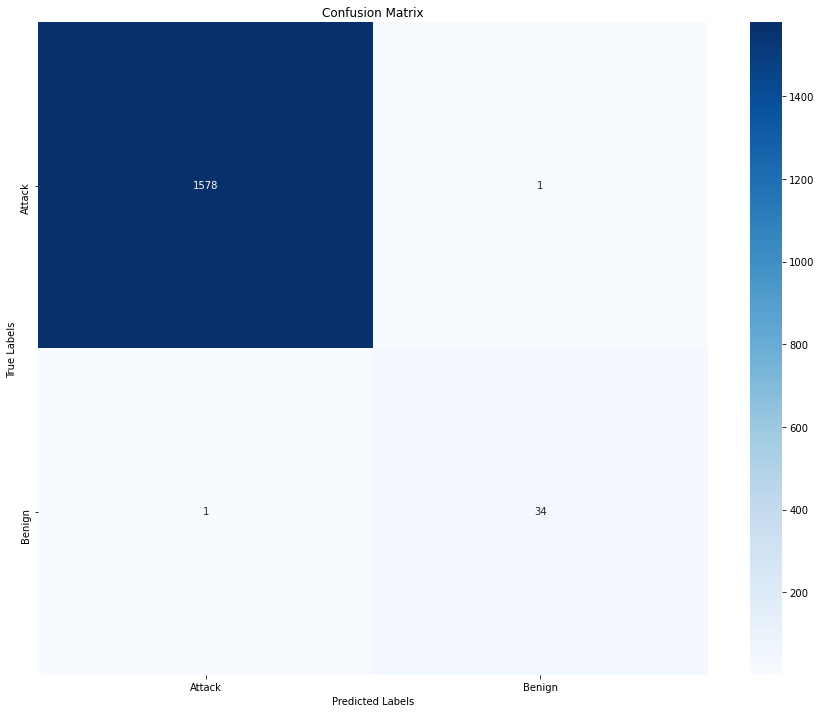

In [43]:
# generate the confusion matrix
cm_ada_ga_2 = confusion_matrix(y_test_sample_2, y_pred_ada_ga_2)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_ada_ga_2, annot=True, fmt='d', cmap='Blues', xticklabels=ada_benchmark.classes_, yticklabels=ada_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 6 Class Classification

In [44]:
# Call the GA function
global_best_fitness, global_best_position = ga_feature_reduction(
    X_train_sample = X_train_sample,
    y_train_sample = y_train_sample_6,
    X_test_sample = X_test_sample,
    y_test_sample = y_test_sample_6,
    population_size = population_size,
    n_generations = n_generations,
    mutation_rate = mutation_rate,
    num_elites = num_elites,
    CLASSIFIER = "ada",
    metric = metric
)

LOOP STEP: Generation 1
Fitness Scores: [0.99566295 0.74907063 0.77571252 0.77137546]
Overall best fitness: 0.9956629, Overall best individual: [0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 1 1 1]
LOOP STEP: Generation 2
Fitness Scores: [0.77571252 0.99566295 0.76208178 0.99690211]
Overall best fitness: 0.9969021, Overall best individual: [0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 0 0 1 0]
LOOP STEP: Generation 3
Fitness Scores: [0.99566295 0.99690211 0.99690211 0.7732342 ]
Overall best fitness: 0.9969021, Overall best individual: [0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 0 0 1 0]
Termination Reason: None
Best Fitness: 0.9969021065675341
Best Individual: [0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 0 0 1 0]


In [45]:
# use the best features identified by GA
selected_features = np.array(global_best_position, dtype=bool)
# Apply the selected features to your datasets
X_train_selected = X_train_sample[:, selected_features]
X_test_selected = X_test_sample[:, selected_features]

ada_benchmark.fit(X_train_selected, y_train_sample_6) 
y_pred_ada_ga_6 = ada_benchmark.predict(X_test_selected)  

In [46]:
# print the classification report
report_ada_ga_6 = classification_report(y_test_sample_6, y_pred_ada_ga_6, output_dict=True)
print(classification_report(y_test_sample_6, y_pred_ada_ga_6))

print(f"Number of selected features: {X_train_selected.shape[1]}")

# calculate accuracy
accuracy_ada_ga_6 = accuracy_score(y_test_sample_6, y_pred_ada_ga_6)
recall_ada_ga_6 = recall_score(y_test_sample_6, y_pred_ada_ga_6, average="weighted")
precision_ada_ga_6 = precision_score(y_test_sample_6, y_pred_ada_ga_6, average="weighted")
f1_ada_ga_6 = f1_score(y_test_sample_6, y_pred_ada_ga_6, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_ada_ga_6:.5f}")

              precision    recall  f1-score   support

      Benign       1.00      0.91      0.96        35
        DDos       1.00      1.00      1.00      1053
         Dos       1.00      1.00      1.00       438
        MQTT       0.98      1.00      0.99        62
       Recon       0.86      1.00      0.93        25
    Spoofing       0.00      0.00      0.00         1

    accuracy                           1.00      1614
   macro avg       0.81      0.82      0.81      1614
weighted avg       1.00      1.00      1.00      1614

Number of selected features: 21
Accuracy: 0.99690


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

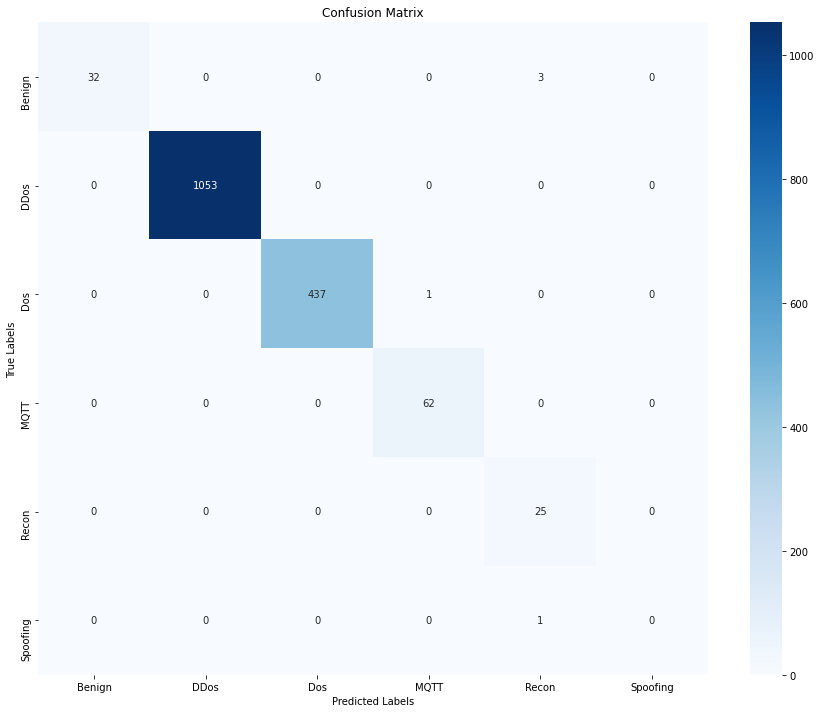

In [47]:
# generate the confusion matrix
cm_ada_ga_6 = confusion_matrix(y_test_sample_6, y_pred_ada_ga_6)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_ada_ga_6, annot=True, fmt='d', cmap='Blues', xticklabels=ada_benchmark.classes_, yticklabels=ada_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 19 Class Classification

In [48]:
# Call the GA function
global_best_fitness, global_best_position = ga_feature_reduction(
    X_train_sample = X_train_sample,
    y_train_sample = y_train_sample_19,
    X_test_sample = X_test_sample,
    y_test_sample = y_test_sample_19,
    population_size = population_size,
    n_generations = n_generations,
    mutation_rate = mutation_rate,
    num_elites = num_elites,
    CLASSIFIER = "ada",
    metric = metric
)

LOOP STEP: Generation 1
Fitness Scores: [0.69640644 0.98513011 0.90644362 0.91140025]
Overall best fitness: 0.9851301, Overall best individual: [1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0]
LOOP STEP: Generation 2
Fitness Scores: [0.91140025 0.98513011 0.988228   0.91201983]
Overall best fitness: 0.9882280, Overall best individual: [0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 0 0]
LOOP STEP: Generation 3
Fitness Scores: [0.98513011 0.988228   0.91263941 0.63011152]
Overall best fitness: 0.9882280, Overall best individual: [0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 0 0]
Termination Reason: None
Best Fitness: 0.9882280049566295
Best Individual: [0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 0 0]


In [49]:
# use the best features identified by GA
selected_features = np.array(global_best_position, dtype=bool)
# Apply the selected features to your datasets
X_train_selected = X_train_sample[:, selected_features]
X_test_selected = X_test_sample[:, selected_features]

ada_benchmark.fit(X_train_selected, y_train_sample_19) 
y_pred_ada_ga_19 = ada_benchmark.predict(X_test_selected)

In [50]:
# print the classification report
report_ada_ga_19 = classification_report(y_test_sample_19, y_pred_ada_ga_19, output_dict=True)
print(classification_report(y_test_sample_19, y_pred_ada_ga_19))

print(f"Number of selected features: {X_train_selected.shape[1]}")

# calculate accuracy
accuracy_ada_ga_19 = accuracy_score(y_test_sample_19, y_pred_ada_ga_19)
recall_ada_ga_19 = recall_score(y_test_sample_19, y_pred_ada_ga_19, average="weighted")
precision_ada_ga_19 = precision_score(y_test_sample_19, y_pred_ada_ga_19, average="weighted")
f1_ada_ga_19 = f1_score(y_test_sample_19, y_pred_ada_ga_19, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_ada_ga_19:.5f}")

                    precision    recall  f1-score   support

      ARP_spoofing       0.00      0.00      0.00         1
            Benign       0.97      0.97      0.97        35
         DDoS_ICMP       1.00      1.00      1.00       352
          DDoS_SYN       1.00      1.00      1.00       177
          DDoS_TCP       1.00      1.00      1.00       157
          DDoS_UDP       1.00      1.00      1.00       367
DDoS_connect_flood       1.00      1.00      1.00        41
DDoS_publish_flood       1.00      0.11      0.20         9
          DoS_ICMP       1.00      1.00      1.00       120
           DoS_SYN       1.00      0.99      0.99        97
           DoS_TCP       1.00      0.99      0.99        78
           DoS_UDP       1.00      1.00      1.00       143
 DoS_connect_flood       1.00      1.00      1.00         1
 DoS_publish_flood       0.58      1.00      0.73        11
           OS_scan       0.33      0.33      0.33         3
         Port_scan       0.77      0.81

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.

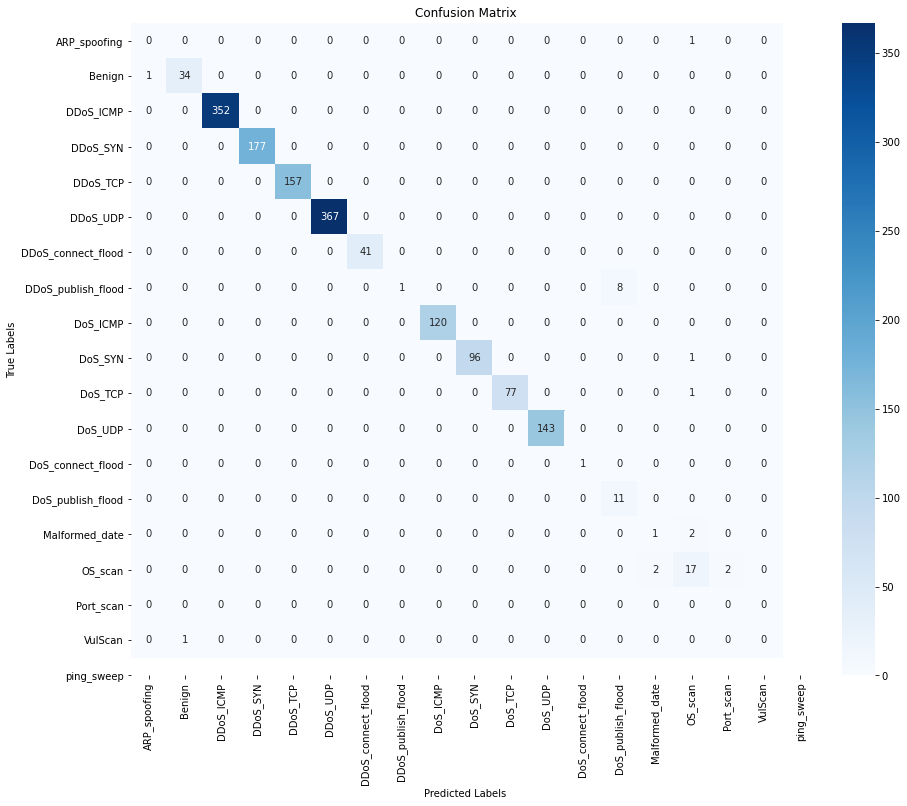

In [51]:
# generate the confusion matrix
cm_ada_ga_19 = confusion_matrix(y_test_sample_19, y_pred_ada_ga_19)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_ada_ga_19, annot=True, fmt='d', cmap='Blues', xticklabels=ada_benchmark.classes_, yticklabels=ada_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

#### Binary Classification

In [52]:
# Call the GA function
global_best_fitness, global_best_position = ga_feature_reduction(
    X_train_sample = X_train_sample,
    y_train_sample = y_train_sample_2,
    X_test_sample = X_test_sample,
    y_test_sample = y_test_sample_2,
    population_size = population_size,
    n_generations = n_generations,
    mutation_rate = mutation_rate,
    num_elites = num_elites,
    CLASSIFIER = "rf",
    metric = metric
)

LOOP STEP: Generation 1
Fitness Scores: [0.99628253 0.99752169 0.99752169 0.99566295]
Overall best fitness: 0.9975217, Overall best individual: [0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 1 1 1 1 0 0]
LOOP STEP: Generation 2
Fitness Scores: [0.99752169 0.99752169 0.99566295 0.99690211]
Overall best fitness: 0.9975217, Overall best individual: [0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 1 1 1 1 0 0]
LOOP STEP: Generation 3
Fitness Scores: [0.99752169 0.99752169 0.99566295 0.99690211]
Overall best fitness: 0.9975217, Overall best individual: [0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 1 1 1 1 0 0]
Termination Reason: None
Best Fitness: 0.9975216852540273
Best Individual: [0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 1 1 1 1 0 0]


In [53]:
# use the best features identified by GA
selected_features = np.array(global_best_position, dtype=bool)
# Apply the selected features to your datasets
X_train_selected = X_train_sample[:, selected_features]
X_test_selected = X_test_sample[:, selected_features]

rf_benchmark.fit(X_train_selected, y_train_sample_2) 
y_pred_rf_ga_2 = rf_benchmark.predict(X_test_selected)

In [54]:
# print the classification report
report_rf_ga_2 = classification_report(y_test_sample_2, y_pred_rf_ga_2, output_dict=True)
print(classification_report(y_test_sample_2, y_pred_rf_ga_2))

print(f"Number of selected features: {X_train_selected.shape[1]}")

# calculate accuracy
accuracy_rf_ga_2 = accuracy_score(y_test_sample_2, y_pred_rf_ga_2)
recall_rf_ga_2 = recall_score(y_test_sample_2, y_pred_rf_ga_2, average="weighted")
precision_rf_ga_2 = precision_score(y_test_sample_2, y_pred_rf_ga_2, average="weighted")
f1_rf_ga_2 = f1_score(y_test_sample_2, y_pred_rf_ga_2, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_rf_ga_2:.5f}")

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      1579
      Benign       1.00      0.91      0.96        35

    accuracy                           1.00      1614
   macro avg       1.00      0.96      0.98      1614
weighted avg       1.00      1.00      1.00      1614

Number of selected features: 25
Accuracy: 0.99814


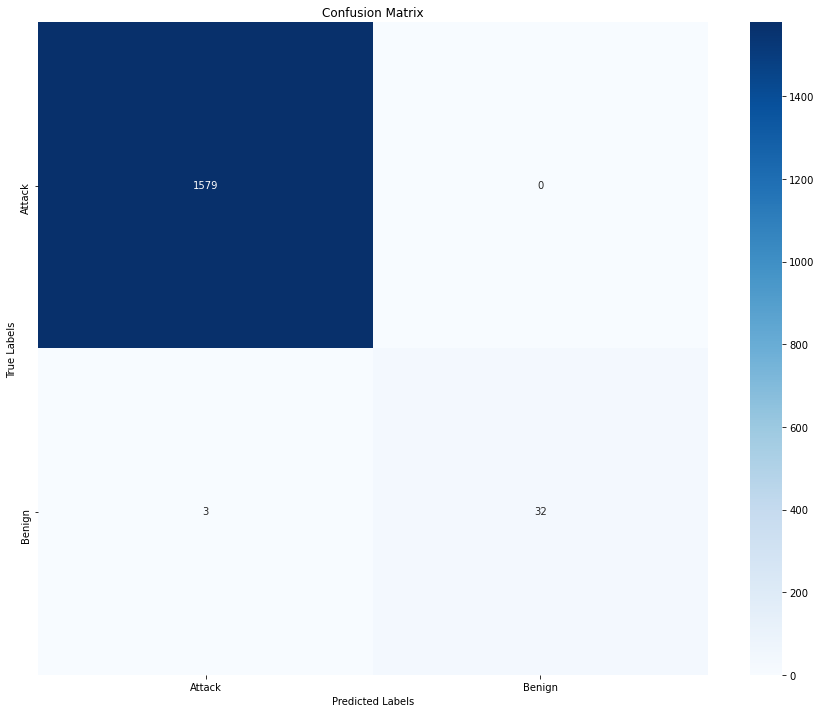

In [55]:
# generate the confusion matrix
cm_rf_ga_2 = confusion_matrix(y_test_sample_2, y_pred_rf_ga_2)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_rf_ga_2, annot=True, fmt='d', cmap='Blues', xticklabels=rf_benchmark.classes_, yticklabels=rf_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 6 Class Classification

In [56]:
# Call the GA function
global_best_fitness, global_best_position = ga_feature_reduction(
    X_train_sample = X_train_sample,
    y_train_sample = y_train_sample_6,
    X_test_sample = X_test_sample,
    y_test_sample = y_test_sample_6,
    population_size = population_size,
    n_generations = n_generations,
    mutation_rate = mutation_rate,
    num_elites = num_elites,
    CLASSIFIER = "rf",
    metric = metric
)

LOOP STEP: Generation 1
Fitness Scores: [0.75526642 0.99566295 0.99442379 0.99566295]
Overall best fitness: 0.9956629, Overall best individual: [0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 0 1 0 0 1 1]
LOOP STEP: Generation 2
Fitness Scores: [0.99442379 0.99690211 0.99628253 0.70508055]
Overall best fitness: 0.9969021, Overall best individual: [0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1
 0 1 0 1 0 0 0 1]
LOOP STEP: Generation 3
Fitness Scores: [0.99752169 0.99690211 0.99752169 0.73482032]
Overall best fitness: 0.9975217, Overall best individual: [1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 0 0 1 0]
Termination Reason: None
Best Fitness: 0.9975216852540273
Best Individual: [1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 0 0 1 0]


In [57]:
# use the best features identified by GA
selected_features = np.array(global_best_position, dtype=bool)
# Apply the selected features to your datasets
X_train_selected = X_train_sample[:, selected_features]
X_test_selected = X_test_sample[:, selected_features]

rf_benchmark.fit(X_train_selected, y_train_sample_6) 
y_pred_rf_ga_6 = rf_benchmark.predict(X_test_selected)

In [58]:
# print the classification report
report_rf_ga_6 = classification_report(y_test_sample_6, y_pred_rf_ga_6, output_dict=True)
print(classification_report(y_test_sample_6, y_pred_rf_ga_6))

print(f"Number of selected features: {X_train_selected.shape[1]}")

# calculate accuracy
accuracy_rf_ga_6 = accuracy_score(y_test_sample_6, y_pred_rf_ga_6)
recall_rf_ga_6 = recall_score(y_test_sample_6, y_pred_rf_ga_6, average="weighted")
precision_rf_ga_6 = precision_score(y_test_sample_6, y_pred_rf_ga_6, average="weighted")
f1_rf_ga_6 = f1_score(y_test_sample_6, y_pred_rf_ga_6, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_rf_ga_6:.5f}")

              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        35
        DDos       1.00      1.00      1.00      1053
         Dos       1.00      1.00      1.00       438
        MQTT       1.00      1.00      1.00        62
       Recon       0.85      0.92      0.88        25
    Spoofing       0.00      0.00      0.00         1

    accuracy                           1.00      1614
   macro avg       0.80      0.82      0.81      1614
weighted avg       1.00      1.00      1.00      1614

Number of selected features: 20
Accuracy: 0.99628


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

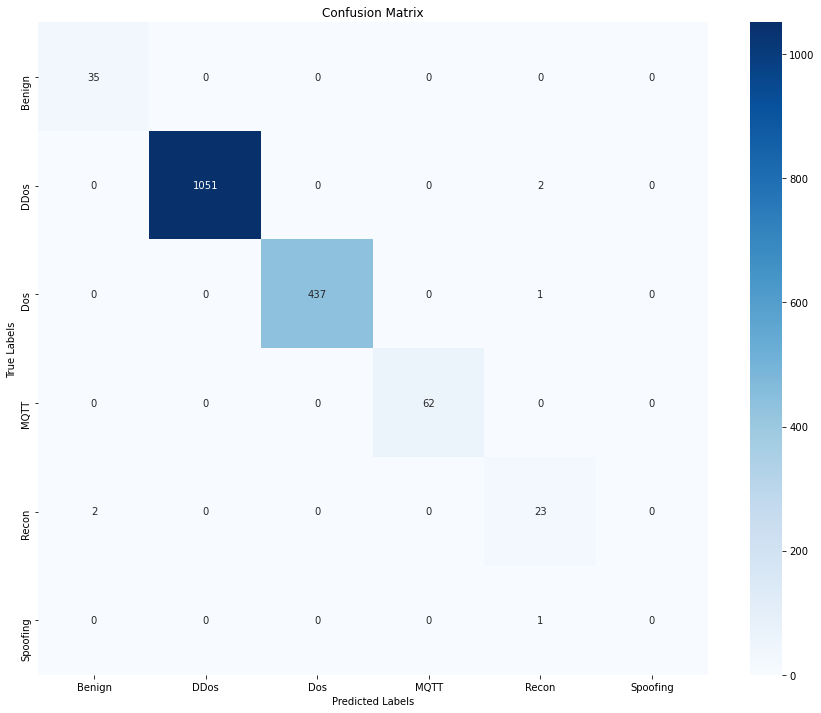

In [59]:
# generate the confusion matrix
cm_rf_ga_6 = confusion_matrix(y_test_sample_6, y_pred_rf_ga_6)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_rf_ga_6, annot=True, fmt='d', cmap='Blues', xticklabels=rf_benchmark.classes_, yticklabels=rf_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 19 Class Classification

In [60]:
# Call the GA function
global_best_fitness, global_best_position = ga_feature_reduction(
    X_train_sample = X_train_sample,
    y_train_sample = y_train_sample_19,
    X_test_sample = X_test_sample,
    y_test_sample = y_test_sample_19,
    population_size = population_size,
    n_generations = n_generations,
    mutation_rate = mutation_rate,
    num_elites = num_elites,
    CLASSIFIER = "rf",
    metric = metric
)

LOOP STEP: Generation 1
Fitness Scores: [0.98513011 0.98574969 0.98698885 0.98513011]
Overall best fitness: 0.9869888, Overall best individual: [0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 0 0 1 1]
LOOP STEP: Generation 2
Fitness Scores: [0.98574969 0.98574969 0.98327138 0.98513011]
Overall best fitness: 0.9869888, Overall best individual: [0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 0 0 1 1]
LOOP STEP: Generation 3
Fitness Scores: [0.98636927 0.98698885 0.98574969 0.99008674]
Overall best fitness: 0.9900867, Overall best individual: [0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 0 0 1 1]
Termination Reason: None
Best Fitness: 0.990086741016109
Best Individual: [0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 0 0 1 1]


In [61]:
# use the best features identified by GA
selected_features = np.array(global_best_position, dtype=bool)
# Apply the selected features to your datasets
X_train_selected = X_train_sample[:, selected_features]
X_test_selected = X_test_sample[:, selected_features]

rf_benchmark.fit(X_train_selected, y_train_sample_19) 
y_pred_rf_ga_19 = rf_benchmark.predict(X_test_selected)

In [62]:
# print the classification report
report_rf_ga_19 = classification_report(y_test_sample_19, y_pred_rf_ga_19, output_dict=True)
print(classification_report(y_test_sample_19, y_pred_rf_ga_19))

print(f"Number of selected features: {X_train_selected.shape[1]}")

# calculate accuracy
accuracy_rf_ga_19 = accuracy_score(y_test_sample_19, y_pred_rf_ga_19)
recall_rf_ga_19 = recall_score(y_test_sample_19, y_pred_rf_ga_19, average="weighted")
precision_rf_ga_19 = precision_score(y_test_sample_19, y_pred_rf_ga_19, average="weighted")
f1_rf_ga_19 = f1_score(y_test_sample_19, y_pred_rf_ga_19, average="weighted")

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_rf_ga_19:.5f}")

                    precision    recall  f1-score   support

      ARP_spoofing       0.00      0.00      0.00         1
            Benign       0.91      0.91      0.91        35
         DDoS_ICMP       1.00      1.00      1.00       352
          DDoS_SYN       1.00      1.00      1.00       177
          DDoS_TCP       1.00      1.00      1.00       157
          DDoS_UDP       1.00      1.00      1.00       367
DDoS_connect_flood       1.00      1.00      1.00        41
DDoS_publish_flood       1.00      0.44      0.62         9
          DoS_ICMP       1.00      0.99      1.00       120
           DoS_SYN       1.00      1.00      1.00        97
           DoS_TCP       1.00      1.00      1.00        78
           DoS_UDP       1.00      1.00      1.00       143
 DoS_connect_flood       1.00      1.00      1.00         1
 DoS_publish_flood       0.69      1.00      0.81        11
           OS_scan       1.00      0.33      0.50         3
         Port_scan       0.78      1.00

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/

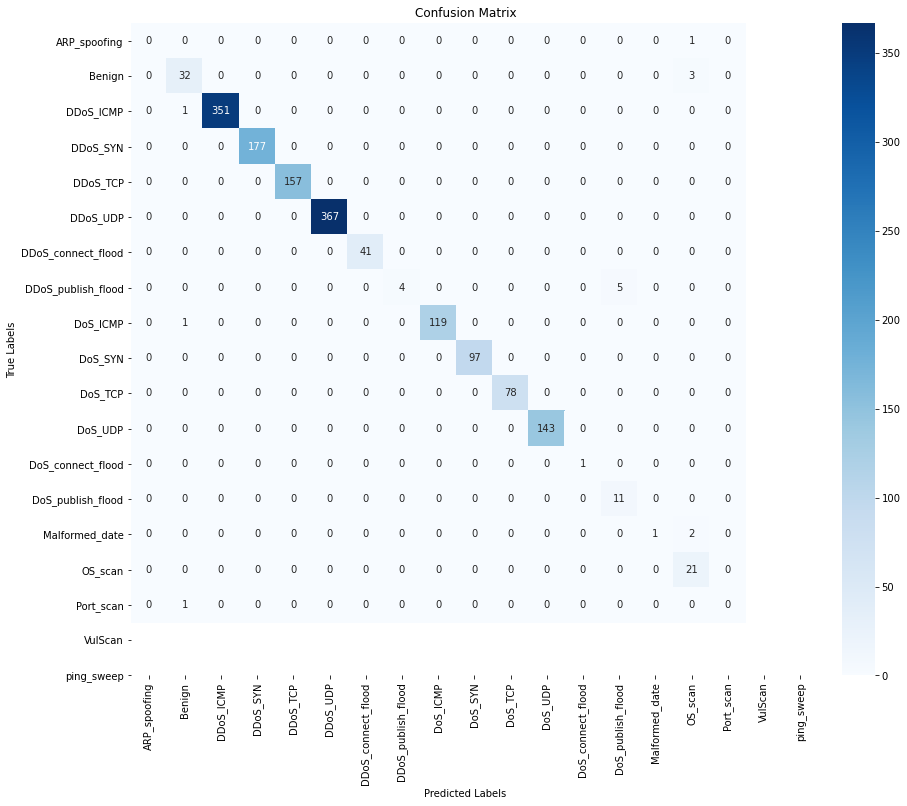

In [63]:
# generate the confusion matrix
cm_rf_ga_19 = confusion_matrix(y_test_sample_19, y_pred_rf_ga_19)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_rf_ga_19, annot=True, fmt='d', cmap='Blues', xticklabels=rf_benchmark.classes_, yticklabels=rf_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Collect Output

In [67]:
# Define the possible values for each column
classifiers = ["LR", "Ada", "RF"]
bio_algos = ["Benchmark", "GA"]
label_classes = [2, 6, 19]
metrics = ["accuracy", "recall", "precision", "f1"]

# Generate all combinations
combinations = list(product(classifiers, bio_algos, label_classes, metrics))

# Create the DataFrame with columns and set the initial 'value' to NaN
df = pd.DataFrame(combinations, columns=["classifier", "bio_algo", "label_classes", "metric"])
df["value"] = pd.NA  # Set 'value' column to NaN

# Create a dictionary for these mappings
value_mappings = {
    ('LR', 'Benchmark', 2, 'accuracy'): accuracy_lr_benchmark_2,
    ('LR', 'Benchmark', 6, 'accuracy'): accuracy_lr_benchmark_6,
    ('LR', 'Benchmark', 19, 'accuracy'): accuracy_lr_benchmark_19,
    ('LR', 'GA', 2, 'accuracy'): accuracy_lr_ga_2,
    ('LR', 'GA', 6, 'accuracy'): accuracy_lr_ga_6,
    ('LR', 'GA', 19, 'accuracy'): accuracy_lr_ga_19,
    ('Ada', 'Benchmark', 2, 'accuracy'): accuracy_ada_benchmark_2,
    ('Ada', 'Benchmark', 6, 'accuracy'): accuracy_ada_benchmark_6,
    ('Ada', 'Benchmark', 19, 'accuracy'): accuracy_ada_benchmark_19,
    ('Ada', 'GA', 2, 'accuracy'): accuracy_ada_ga_2,
    ('Ada', 'GA', 6, 'accuracy'): accuracy_ada_ga_6,
    ('Ada', 'GA', 19, 'accuracy'): accuracy_ada_ga_19,
    ('RF', 'Benchmark', 2, 'accuracy'): accuracy_rf_benchmark_2,
    ('RF', 'Benchmark', 6, 'accuracy'): accuracy_rf_benchmark_6,
    ('RF', 'Benchmark', 19, 'accuracy'): accuracy_rf_benchmark_19,
    ('RF', 'GA', 2, 'accuracy'): accuracy_rf_ga_2,
    ('RF', 'GA', 6, 'accuracy'): accuracy_rf_ga_6,
    ('RF', 'GA', 19, 'accuracy'): accuracy_rf_ga_19,


    ('LR', 'Benchmark', 2, 'recall'): recall_lr_benchmark_2,
    ('LR', 'Benchmark', 6, 'recall'): recall_lr_benchmark_6,
    ('LR', 'Benchmark', 19, 'recall'): recall_lr_benchmark_19,
    ('LR', 'GA', 2, 'recall'): recall_lr_ga_2,
    ('LR', 'GA', 6, 'recall'): recall_lr_ga_6,
    ('LR', 'GA', 19, 'recall'): recall_lr_ga_19,
    ('Ada', 'Benchmark', 2, 'recall'): recall_ada_benchmark_2,
    ('Ada', 'Benchmark', 6, 'recall'): recall_ada_benchmark_6,
    ('Ada', 'Benchmark', 19, 'recall'): recall_ada_benchmark_19,
    ('Ada', 'GA', 2, 'recall'): recall_ada_ga_2,
    ('Ada', 'GA', 6, 'recall'): recall_ada_ga_6,
    ('Ada', 'GA', 19, 'recall'): recall_ada_ga_19,
    ('RF', 'Benchmark', 2, 'recall'): recall_rf_benchmark_2,
    ('RF', 'Benchmark', 6, 'recall'): recall_rf_benchmark_6,
    ('RF', 'Benchmark', 19, 'recall'): recall_rf_benchmark_19,
    ('RF', 'GA', 2, 'recall'): recall_rf_ga_2,
    ('RF', 'GA', 6, 'recall'): recall_rf_ga_6,
    ('RF', 'GA', 19, 'recall'): recall_rf_ga_19,

    ('LR', 'Benchmark', 2, 'precision'): precision_lr_benchmark_2,
    ('LR', 'Benchmark', 6, 'precision'): precision_lr_benchmark_6,
    ('LR', 'Benchmark', 19, 'precision'): precision_lr_benchmark_19,
    ('LR', 'GA', 2, 'precision'): precision_lr_ga_2,
    ('LR', 'GA', 6, 'precision'): precision_lr_ga_6,
    ('LR', 'GA', 19, 'precision'): precision_lr_ga_19,
    ('Ada', 'Benchmark', 2, 'precision'): precision_ada_benchmark_2,
    ('Ada', 'Benchmark', 6, 'precision'): precision_ada_benchmark_6,
    ('Ada', 'Benchmark', 19, 'precision'): precision_ada_benchmark_19,
    ('Ada', 'GA', 2, 'precision'): precision_ada_ga_2,
    ('Ada', 'GA', 6, 'precision'): precision_ada_ga_6,
    ('Ada', 'GA', 19, 'precision'): precision_ada_ga_19,
    ('RF', 'Benchmark', 2, 'precision'): precision_rf_benchmark_2,
    ('RF', 'Benchmark', 6, 'precision'): precision_rf_benchmark_6,
    ('RF', 'Benchmark', 19, 'precision'): precision_rf_benchmark_19,
    ('RF', 'GA', 2, 'precision'): precision_rf_ga_2,
    ('RF', 'GA', 6, 'precision'): precision_rf_ga_6,
    ('RF', 'GA', 19, 'precision'): precision_rf_ga_19,

    ('LR', 'Benchmark', 2, 'f1'): f1_lr_benchmark_2,
    ('LR', 'Benchmark', 6, 'f1'): f1_lr_benchmark_6,
    ('LR', 'Benchmark', 19, 'f1'): f1_lr_benchmark_19,
    ('LR', 'GA', 2, 'f1'): f1_lr_ga_2,
    ('LR', 'GA', 6, 'f1'): f1_lr_ga_6,
    ('LR', 'GA', 19, 'f1'): f1_lr_ga_19,
    ('Ada', 'Benchmark', 2, 'f1'): f1_ada_benchmark_2,
    ('Ada', 'Benchmark', 6, 'f1'): f1_ada_benchmark_6,
    ('Ada', 'Benchmark', 19, 'f1'): f1_ada_benchmark_19,
    ('Ada', 'GA', 2, 'f1'): f1_ada_ga_2,
    ('Ada', 'GA', 6, 'f1'): f1_ada_ga_6,
    ('Ada', 'GA', 19, 'f1'): f1_ada_ga_19,
    ('RF', 'Benchmark', 2, 'f1'): f1_rf_benchmark_2,
    ('RF', 'Benchmark', 6, 'f1'): f1_rf_benchmark_6,
    ('RF', 'Benchmark', 19, 'f1'): f1_rf_benchmark_19,
    ('RF', 'GA', 2, 'f1'): f1_rf_ga_2,
    ('RF', 'GA', 6, 'f1'): f1_rf_ga_6,
    ('RF', 'GA', 19, 'f1'): f1_rf_ga_19
}

# Assign values based on these mappings
for key, value in value_mappings.items():
    classifier, bio_algo, label_class, metric = key
    df.loc[
        (df['classifier'] == classifier) &
        (df['bio_algo'] == bio_algo) &
        (df['label_classes'] == label_class) &
        (df['metric'] == metric),
        'value'
    ] = value

# Display the DataFrame
print(df)

   classifier   bio_algo  label_classes     metric     value
0          LR  Benchmark              2   accuracy  0.983271
1          LR  Benchmark              2     recall  0.983271
2          LR  Benchmark              2  precision  0.983507
3          LR  Benchmark              2         f1  0.983387
4          LR  Benchmark              6   accuracy  0.667286
..        ...        ...            ...        ...       ...
67         RF         GA              6         f1   0.99606
68         RF         GA             19   accuracy  0.991326
69         RF         GA             19     recall  0.991326
70         RF         GA             19  precision  0.991881
71         RF         GA             19         f1  0.990318

[72 rows x 5 columns]


In [65]:
end_time = time.time()  # End time
elapsed_time = end_time - start_time  # Calculate the total time
print(f"Total execution time: {elapsed_time:.2f} seconds")

Total execution time: 103.31 seconds
